Boston House Dataset'i kullanarak bir linear regression modeli oluşturmaya çalışacağım. Scikit learn, Pandas ve Matplotlib gibi kütüphaneler kullanarak oluşturacağım bu projede öncelikle elimizdeki veri setini anlamaya, sonra feature engineering yaparak veriyi modele uygun hale getirmeye ardından başarılı fiyat tahminleri yapabilen bir model elde etmeye çalışacağız. Eğer model istediğimiz kadar başarılı değilse modeli iyileştirmeye yönelik nasıl adımlar izlenebilir ona bakacağız.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("HousingData.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Elimizdeki veriye baktığımızda 506 adet satır olduğunu ve 14 tane sütundan oluştuğunu görüyoruz. Sütunları kısaca açıklamak gerekirse
Özellikler (Bağımsız Değişkenler):
CRIM: Kişi başına düşen suç oranı (şehir bazında).

Yüksek değerler, daha yüksek suç oranını gösterir.

ZN: 25.000 ft²'den büyük arsalar için ayrılmış konut arazisinin yüzdesi.

Daha yüksek değerler, daha düşük nüfus yoğunluğunu gösterebilir.

INDUS: Perakende olmayan iş alanlarının şehirdeki oranı.

Sanayi bölgelerinin yoğunluğunu yansıtır.

CHAS: Charles Nehri'ne komşu olup olmadığını belirten ikili değişken (1: Evet, 0: Hayır).

Nehre yakınlık, konut değerini etkileyebilir.

NOX: Azot oksit konsantrasyonu (10 milyonda birim).

Hava kirliliği seviyesini gösterir.
Medium
+5
cs.toronto.edu
+5
fairlearn.org
+5

RM: Bir konuttaki ortalama oda sayısı.

Daha fazla oda, genellikle daha büyük ve değerli evleri temsil eder.

AGE: 1940'tan önce inşa edilmiş sahibi tarafından kullanılan konutların oranı.

Yüksek değerler, daha eski yapı stoğunu gösterir.

DIS: Beş büyük Boston istihdam merkezine olan ağırlıklı mesafe.

Daha düşük değerler, şehir merkezine yakınlığı ifade eder.
Medium
+1
rasbt.github.io
+1

RAD: Radial otoyollara erişilebilirlik indeksi.

Ulaşım kolaylığını yansıtır.
rasbt.github.io
+1
Medium
+1

TAX: $10.000 başına tam değerli emlak vergisi oranı.

Yüksek değerler, daha yüksek vergi yükünü gösterir.

PTRATIO: Şehirdeki öğrenci-öğretmen oranı.

Eğitim kalitesini dolaylı olarak yansıtabilir.

B: 1000(Bk - 0.63)² formülü ile hesaplanan değer; burada Bk, şehirdeki siyah nüfus oranıdır.

Bu değişkenin kullanımı ve yorumu konusunda dikkatli olunmalıdır.

LSTAT: Düşük sosyo-ekonomik statüye sahip nüfusun yüzdesi.

Yüksek değerler, daha düşük gelirli bölgeleri gösterir.

Hedef Değişken (Bağımlı Değişken):

MEDV: Sahipli konutların medyan değeri (1000$ cinsinden).

Bu, tahmin etmeye çalışacağımız ana değişkendir.

In [134]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2


In [17]:
import seaborn as sns
df["MEDV"].max()

np.float64(50.0)

Korelasyon fonksiyonunu kullanarak "MEDV" sütununun diğer sütunlar ile ilişkisini anlayabiliriz. Hangi özelliklerin doğru orantılı ya da hangi özelliklerin ters orantılı ve ne derece etkilediğini bu şekilde anlayabiliriz. Hatta bunu görsel bir hale getirmek ve daha rahat anlayabilmek için ısı haritası (heatmap) kullanalım

In [31]:
print(df.corr()["MEDV"].sort_values(ascending=False))

MEDV       1.000000
RM         0.695360
ZN         0.373136
B          0.333461
DIS        0.249929
CHAS       0.181391
RAD       -0.381626
CRIM      -0.391363
AGE       -0.394656
NOX       -0.427321
TAX       -0.468536
INDUS     -0.481772
PTRATIO   -0.507787
LSTAT     -0.735822
Name: MEDV, dtype: float64


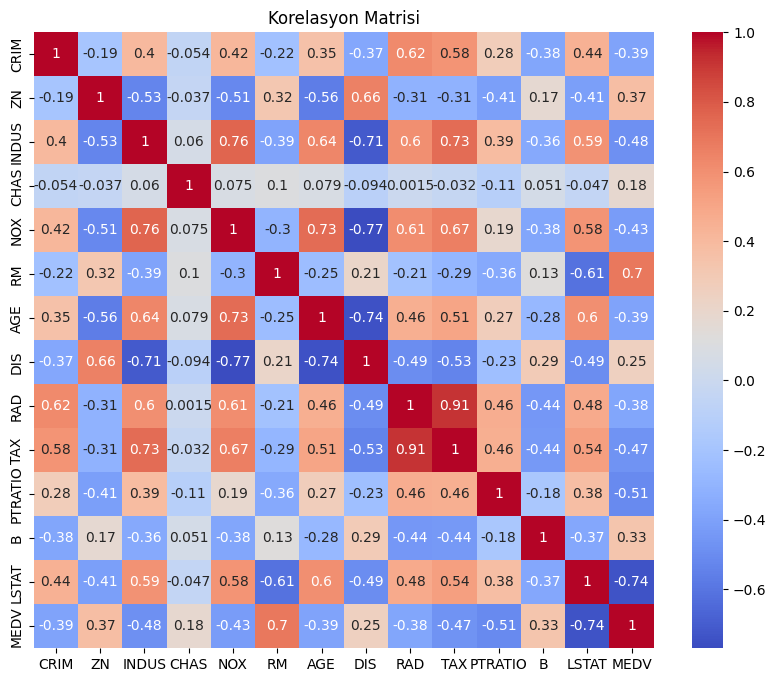

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Verisetinde eksik veriler varsa model oluşturamayız bunun için ilk başta verisetinde eksik veri var mı diye kontrol edip eğer varsa bu verilere ne yapacağımıza karar vermemiz gerekiyor. Outlier varsa bu değerler modeli kötü yönde etkileyebilir, bu yüzden onlarla da ne yapılması gerektiğine karar verilmesi gerekiyor. Outlier değerleri kolayca tespit edebilmek için boxplot kullanılabilir.

In [40]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [67]:
df["CRIM"].sort_values(ascending=False).head(20)

380    88.9762
418    73.5341
405    67.9208
410    51.1358
414    45.7461
404    41.5292
398    38.3518
427    37.6619
413    28.6558
417    25.9406
400    25.0461
403    24.8017
386    24.3938
378    23.6482
387    22.5971
440    22.0511
406    20.7162
384    20.0849
375    19.6091
412    18.8110
Name: CRIM, dtype: float64

<Axes: xlabel='CRIM'>

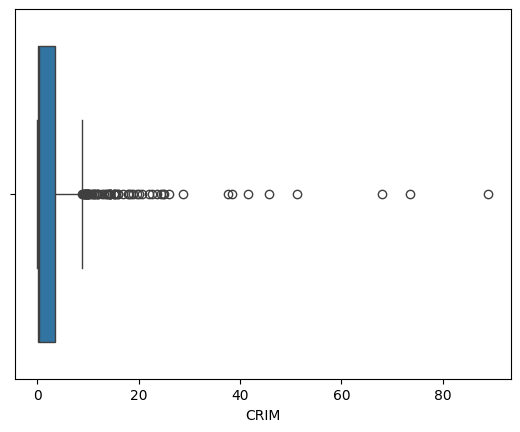

In [53]:
sns.boxplot(x=df["CRIM"])

In [68]:
print("Crime sütunundaki değerlerin medyanı:",df["CRIM"].median())

Crime sütunundaki değerlerin medyanı: 0.253715


In [69]:
df["CRIM"] = df["CRIM"].fillna(df["CRIM"].median())

<Axes: xlabel='ZN'>

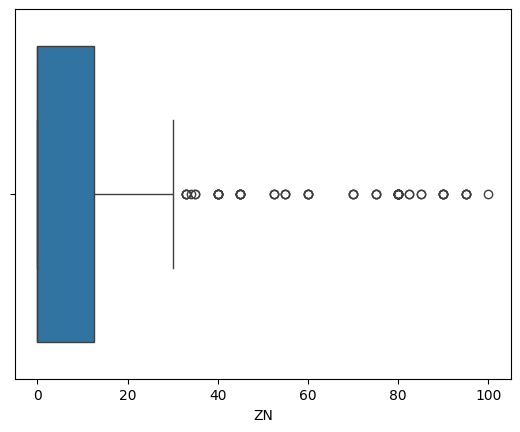

In [82]:
sns.boxplot(x=df["ZN"])

In [84]:
df["ZN"].mean()
df.groupby("ZN")["ZN"].value_counts()

ZN
0.0      360
12.5      10
17.5       1
18.0       1
20.0      20
21.0       4
22.0      10
25.0      10
28.0       2
30.0       5
33.0       4
34.0       1
35.0       2
40.0       6
45.0       6
52.5       3
55.0       3
60.0       4
70.0       3
75.0       3
80.0      14
82.5       2
85.0       2
90.0       5
95.0       4
100.0      1
Name: count, dtype: int64

In [85]:
df["ZN"] = df["ZN"].fillna(0.0)

In [95]:
df["INDUS"] = df["INDUS"].fillna(df["INDUS"].mean())

In [100]:
df["CHAS"] = df["CHAS"].ffill()

In [108]:
df["AGE"] = df["AGE"].fillna(df["AGE"].mean())

In [125]:
df.groupby("LSTAT")["LSTAT"].value_counts()

LSTAT
1.73     1
1.92     1
1.98     1
2.47     1
2.87     1
        ..
34.37    1
34.41    1
34.77    1
36.98    1
37.97    1
Name: count, Length: 438, dtype: int64

In [130]:
df["LSTAT"] = df["LSTAT"].fillna(df["LSTAT"].mean())

Eksik verileri doldurduktan sonra artık modeli oluşturmaya başlayabiliriz. Verisetini eğitim ve test seti olarak ayırdıktan sonra eğitim seti ile modeli eğitim test seti ile modelin başarısını gözlemleyeceğiz. Model başarılı değilse bunun sebeplerinin neler olabileceğini düşünüp modeli daha iyi hale getirmeye çalışacağız.

In [141]:
X = df.drop("MEDV", axis=1)
y = df["MEDV"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [144]:
print("Sabit (intercept):", model.intercept_)
print("Katsayılar:", model.coef_)

Sabit (intercept): 27.90215177353519
Katsayılar: [-1.12099610e-01  2.75291184e-02 -2.71762605e-02  3.27844159e+00
 -1.58910328e+01  4.74926231e+00 -2.00495322e-02 -1.51126055e+00
  2.18294736e-01 -9.01873422e-03 -8.87286033e-01  1.22267064e-02
 -4.38917112e-01]


In [146]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
print("R² Skoru:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))

R² Skoru: 0.6577377361094727
MSE: 25.09938664410916
RMSE: 25.09938664410916


Buradaki sonuçlara göre R^2 skoru 0.65 MSE ise 25.099 gibi bir sayı çıktı. Bu değerler modelin çokta iyi olmadığını geliştirilmeye ihtiyacı olduğunu açıkça göstermektedir.

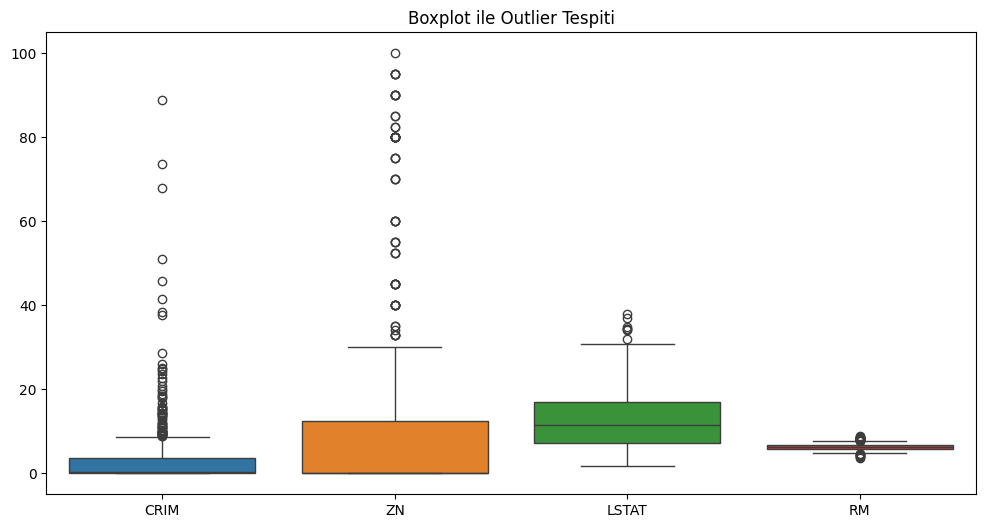

In [159]:
df = pd.read_csv("HousingData.csv")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["CRIM", "ZN", "LSTAT", "RM"]])
plt.title("Boxplot ile Outlier Tespiti")
plt.show()

"CRIM", "ZN", ve "LSTAT" sütunlarında belirgin bir şekilde outlier var ve bunlar bizim modelimizin başarı yüzdesini etkiliyor olabilir. Öncelikle outlier olan veriler ile ilgili işlem yaparak başlayabiliriz modelimizi geliştirmeye.

In [165]:
Q1_CRIM = df["CRIM"].quantile(0.25)
print("Verisetinin alt çeyreği:",Q1_CRIM)
Q2_CRIM = df["CRIM"].quantile(0.75)
print("Verisetinin üst çeyreği:",Q2_CRIM)
IQ_CRIM = Q2_CRIM - Q1_CRIM
alt_sinir_CRIM = Q1_CRIM - 1.5 * IQ_CRIM
üst_sinir_CRIM = Q2_CRIM + 1.5 * IQ_CRIM
print("Çeyrekler açıklığı:", IQ_CRIM)

Verisetinin alt çeyreği: 0.0819
Verisetinin üst çeyreği: 3.5602625000000003
Çeyrekler açıklığı: 3.4783625000000002


In [166]:
Q1_ZN = df["ZN"].quantile(0.25)
print("Verisetinin alt çeyreği:",Q1_ZN)
Q2_ZN = df["ZN"].quantile(0.75)
print("Verisetinin üst çeyreği:",Q2_ZN)
IQ_ZN = Q2_ZN - Q1_ZN
alt_sinir_ZN = Q1_ZN - 1.5 * IQ_ZN
üst_sinir_ZN = Q2_ZN + 1.5 * IQ_ZN
print("Çeyrekler açıklığı:", IQ_ZN)

Verisetinin alt çeyreği: 0.0
Verisetinin üst çeyreği: 12.5
Çeyrekler açıklığı: 12.5


In [167]:
Q1_LSTAT = df["LSTAT"].quantile(0.25)
print("Verisetinin alt çeyreği:",Q1_LSTAT)
Q2_LSTAT = df["LSTAT"].quantile(0.75)
print("Verisetinin üst çeyreği:",Q2_LSTAT)
IQ_LSTAT = Q2_LSTAT - Q1_LSTAT
alt_sinir_LSTAT = Q1_LSTAT - 1.5 * IQ_LSTAT
üst_sinir_LSTAT = Q2_LSTAT + 1.5 * IQ_LSTAT
print("Çeyrekler açıklığı:", IQ_LSTAT)

Verisetinin alt çeyreği: 7.125
Verisetinin üst çeyreği: 16.955000000000002
Çeyrekler açıklığı: 9.830000000000002


Interquartile range kullanarak outlier tespiti yaptık, bazı sütunların alt sınır ve üst sınırlarını bulduk. Değerler bu aralığın dışında ise outlier olduğunu anlıyoruz.

In [168]:
outliers_CRIM = df[(df["CRIM"] < alt_sinir_CRIM) | (df["CRIM"] > üst_sinir_CRIM)]
print("CRIM sütununda outlier sayısı:", outliers_CRIM.shape[0])

CRIM sütununda outlier sayısı: 65


In [170]:
import numpy as np

df["CRIM_log"] = np.log1p(df["CRIM"])

In [173]:
outliers_LSTAT = df[(df["LSTAT"] < alt_sinir_LSTAT) | (df["LSTAT"] > üst_sinir_LSTAT)]
print("LSTAT sütununda outlier sayısı:", outliers_LSTAT.shape[0])

LSTAT sütununda outlier sayısı: 7


Şimdi bazı sütunlardaki verileri grafiksel olarak görselleştirerek normal distribution, right skewed ya da left skewed olup olmadığına yani verinin nasıl bir dağılım gösterdiğine bakalım. Outlier olan verilerle ilgili yapılabilecek birkaç seçenek var bunlardan birisi verileri silmek olabilir bir başka yol verileri bizim istediğimiz hale gelecek şekilde düzenlemek olabilir. Ben burada anormal olan verileri log transformation kullanarak grafiği normal dağılıma yaklaştırmayı deneyeceğim. Bu sayede modelimizin öncekine göre daha başarılı sonuçlar vermesini bekleyebiliriz.

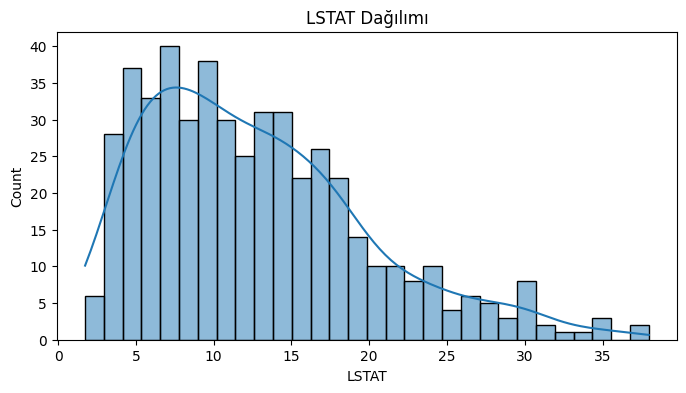

In [174]:
plt.figure(figsize=(8, 4))
sns.histplot(df["LSTAT"], kde=True, bins=30)
plt.title("LSTAT Dağılımı")
plt.show()

In [178]:
df["LSTAT_log"] = np.log1p(df["LSTAT"])

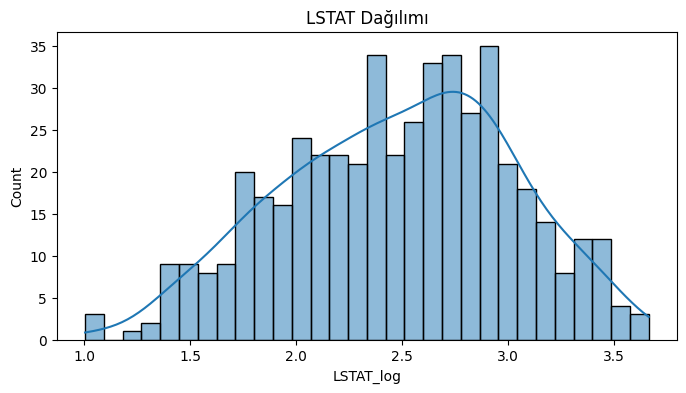

In [180]:
plt.figure(figsize=(8, 4))
sns.histplot(df["LSTAT_log"], kde=True, bins=30)
plt.title("LSTAT Dağılımı")
plt.show()

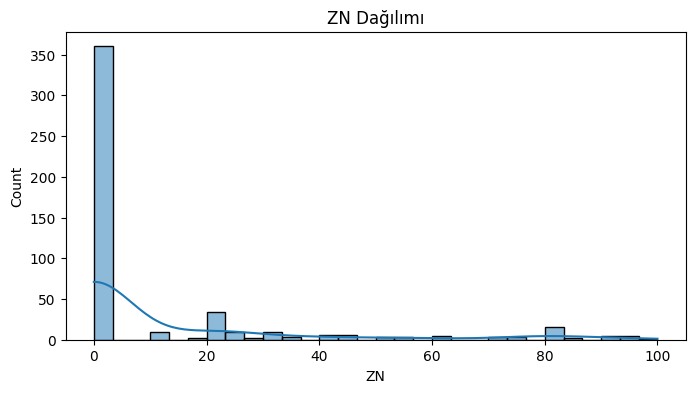

In [181]:
plt.figure(figsize=(8, 4))
sns.histplot(df["ZN"], kde=True, bins=30)
plt.title("ZN Dağılımı")
plt.show()

In [183]:
df["ZN_log"] = np.log1p(df["ZN"])

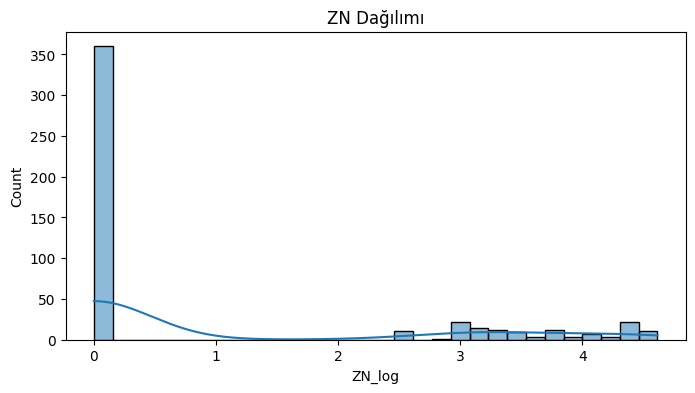

In [184]:
plt.figure(figsize=(8, 4))
sns.histplot(df["ZN_log"], kde=True, bins=30)
plt.title("ZN Dağılımı")
plt.show()

In [188]:
df["ZN_log"] = df["ZN_log"].fillna(0.0)

In [193]:
df["CRIM_log"] = df["CRIM_log"].fillna(df["CRIM"].mean())
df["LSTAT_log"] = df["LSTAT_log"].fillna(df["LSTAT_log"].mean())
df["INDUS"] = df["INDUS"].fillna(df["INDUS"].mean())
df["CHAS"] = df["CHAS"].ffill()
df["AGE"] = df["AGE"].fillna(df["AGE"].mean())

In [198]:
X = df[["CRIM_log", "ZN_log", "RM", "AGE", "DIS", "TAX", "PTRATIO", "B", "LSTAT_log", "INDUS", "NOX", "RAD", "CHAS"]]
y = df["MEDV"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [200]:
print("Sabit (intercept):", model.intercept_)
print("Katsayılar:", model.coef_)

Sabit (intercept): 47.33795310195399
Katsayılar: [-5.03161119e-01  2.35907782e-01  3.58086193e+00 -1.29992832e-03
 -1.35651473e+00 -8.02773650e-03 -8.08841066e-01  1.03188702e-02
 -8.72020050e+00 -3.68645934e-02 -1.32701083e+01  1.90355725e-01
  3.16310606e+00]


In [202]:
y_pred = model.predict(X_test)
print("R² Skoru:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))

R² Skoru: 0.7227153755337696
MSE: 20.33433052429812
RMSE: 20.33433052429812


Veri üzerinde gerekli değişiklikleri yaptıktan sonra buradaki sonuçlarda görüyoruz ki modelimizin başarı oranı önceki modelimizin başarı oranına göre daha iyi hale gelmiş.